In [1]:
from transformers import pipeline
from transformers import (AutoModelWithLMHead, 
                          AutoTokenizer, 
                          BertConfig)
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
)
import torch
import matplotlib.pyplot as plt
import numpy as np


In [79]:
tokenizer = AutoTokenizer.from_pretrained("tomh/toxigen_roberta")
model = AutoModelForSequenceClassification.from_pretrained("tomh/toxigen_roberta")
model.config.output_hidden_states=True
model.config.output_attentions=True
model = AutoModelForSequenceClassification.from_pretrained('tomh/toxigen_roberta', config=model.config).eval()

In [4]:
tokenizer = AutoTokenizer.from_pretrained("mohsenfayyaz/toxicity-classifier")
model = AutoModelForSequenceClassification.from_pretrained("mohsenfayyaz/toxicity-classifier")
model.config.output_hidden_states=True
model.config.output_attentions=True
model = AutoModelForSequenceClassification.from_pretrained('mohsenfayyaz/toxicity-classifier', config=model.config).eval()

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("affahrizain/roberta-base-finetuned-jigsaw-toxic")
model = AutoModelForSequenceClassification.from_pretrained("affahrizain/roberta-base-finetuned-jigsaw-toxic")
model.config.output_hidden_states=True
model.config.output_attentions=True
model = AutoModelForSequenceClassification.from_pretrained('affahrizain/roberta-base-finetuned-jigsaw-toxic', config=model.config).eval()

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("unitary/toxic-bert")
model = AutoModelForSequenceClassification.from_pretrained("unitary/toxic-bert")
model.config.output_hidden_states=True
model.config.output_attentions=True
model = AutoModelForSequenceClassification.from_pretrained('unitary/toxic-bert', config=model.config).eval()

## 여기서부터가 진쫘~
위에는 toxigen roberta 찍어보고싶으면~

In [23]:
target_str = "Murder is dangerous"

In [24]:
input_ids = torch.LongTensor(tokenizer(target_str)['input_ids'])
output = model(input_ids.reshape(1, -1))
logit_output = output['logits']
att_output = output['attentions']

In [25]:
def get_result(logits):
    softmax = torch.nn.Softmax(dim=1)
    prob = softmax(logits)[0]
    if prob[0]>=0.5:
        return "untoxic", prob[0].item()
    else:
        return "toxic", prob[1].item()
get_result(logit_output)

('untoxic', 0.5960783958435059)

In [26]:
decoded_lst = []
for idx in input_ids:
    decoded_lst.append(tokenizer.decode(idx))
decoded_lst

['[CLS]', 'murder', 'is', 'dangerous', '[SEP]']

In [27]:
len(att_output)

12

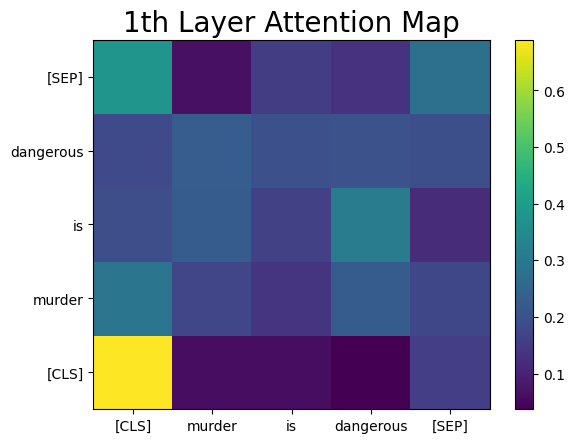

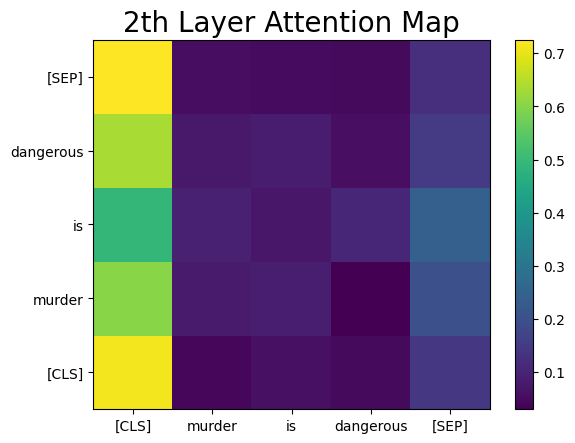

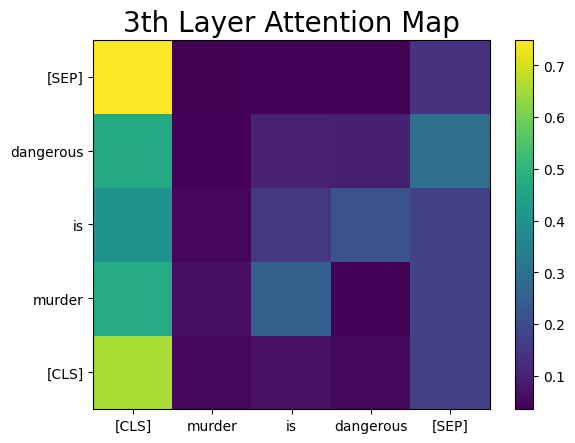

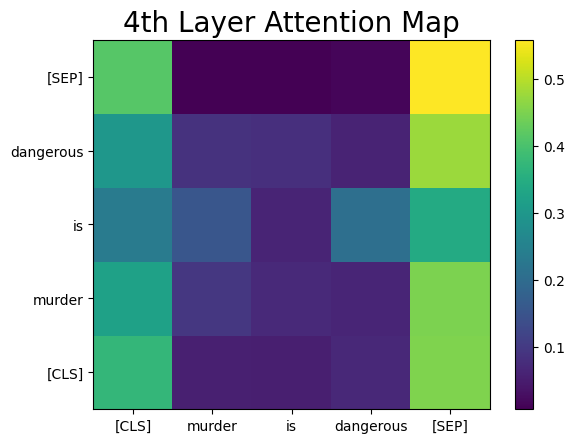

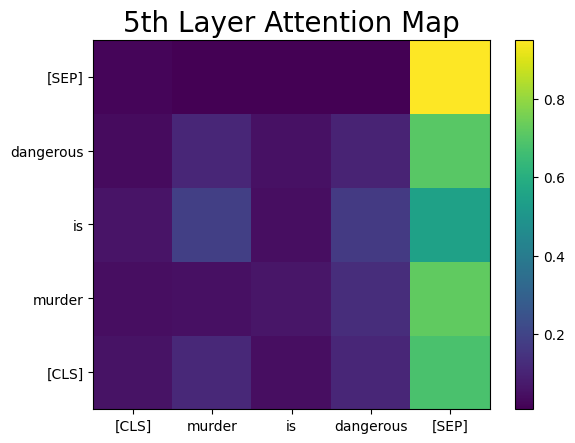

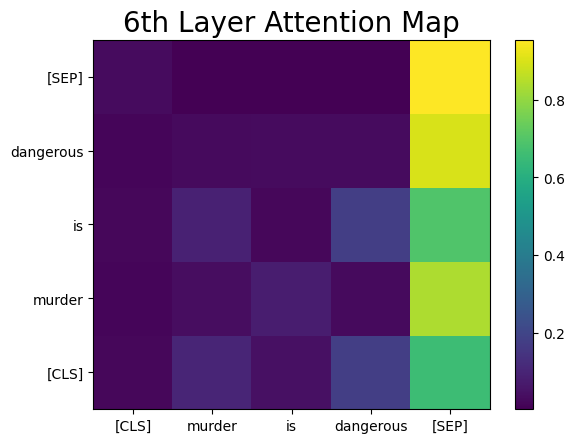

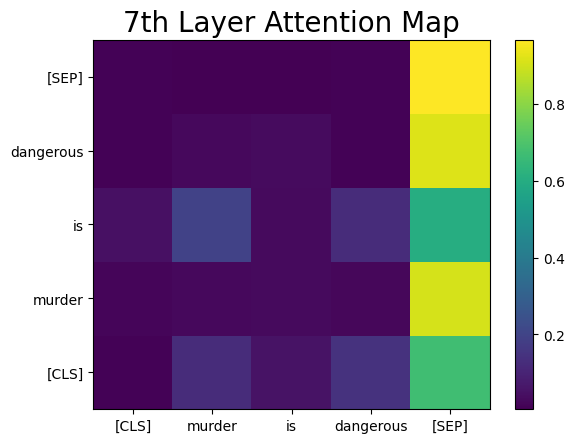

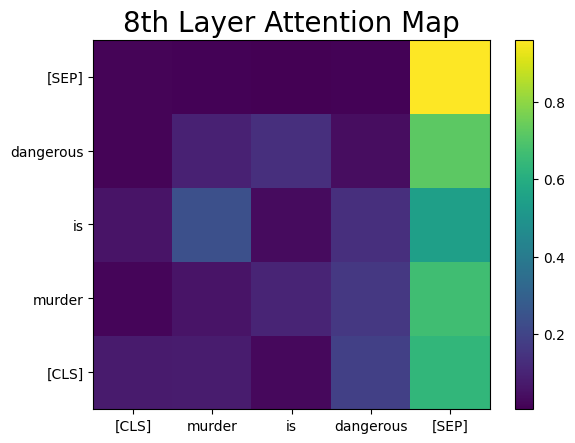

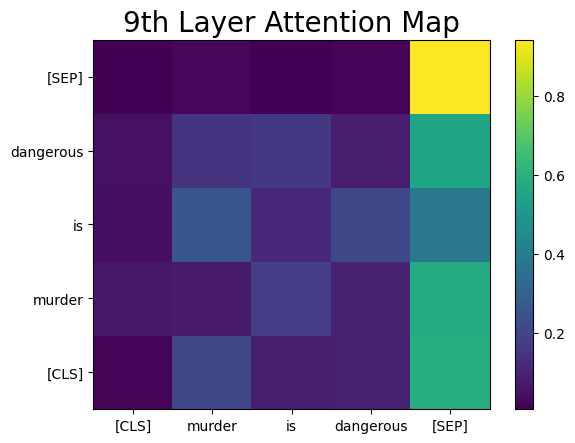

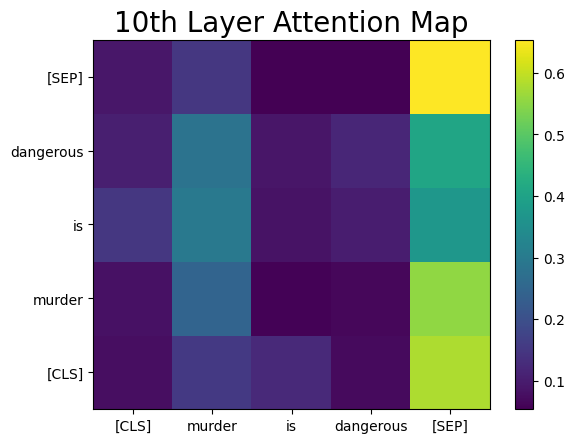

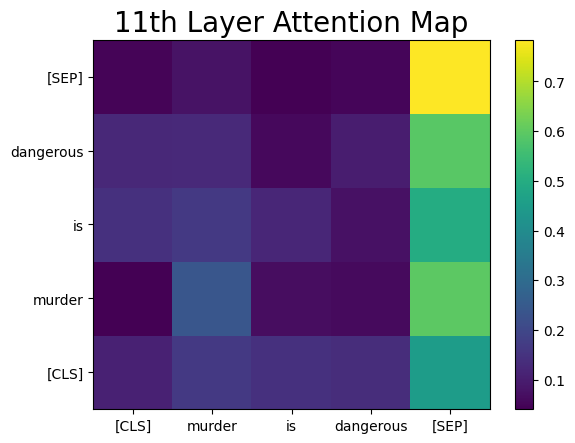

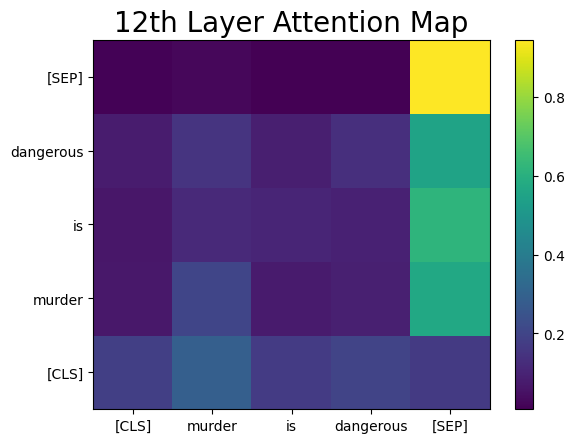

In [28]:
for layer in range(len(att_output)):
    df = att_output[layer][0].mean(dim=0).detach().numpy()
    plt.pcolor(df)
    plt.xticks(np.arange(0.5, df.shape[1], 1), decoded_lst)
    plt.yticks(np.arange(0.5, df.shape[1], 1), decoded_lst)
    plt.title(f'{layer+1}th Layer Attention Map', fontsize=20)
    plt.colorbar()
    plt.show()